In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import math
import sqlite3
import pandas as pd
import numpy as np
import urllib
from lxml import etree
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sqlite3
import pickle
import math
import numpy as np
from sklearn.pipeline import Pipeline
from numpy import diff
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
import matplotlib.cm as cm
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.colors as mcolors
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [190]:
all_individuals = pd.read_pickle("individualstatsnanfree.pkl")

In [221]:
def silhouette_score(estimator, X):
    estimator[0].fit(X)
    new = estimator[0].transform(X)
    estimator[1].fit(new)
    new = estimator[1].transform(new)
    clusters = estimator[2].fit_predict(new)
    score = metrics.silhouette_score(new, clusters)
    return score

X = all_individuals.drop(['Name', 'Team'], axis = 1)
random_state = 23
cv = [(slice(None), slice(None))]

clusteralgs = [KMeans(random_state=random_state),
               MiniBatchKMeans(random_state=random_state),
               GaussianMixture(random_state=random_state),
               Birch()]

params = [##KMeans
          {'pca__n_components':list(range(2,14)),
           'clust__n_clusters':list(range(20,40))}, 
          ##MiniBatchKMeans
          {'pca__n_components':list(range(2,14)),
           'clust__n_clusters':list(range(20,40))},
          ##GaussianMixture 
          {'pca__n_components':list(range(2,14)),
           'clust__n_components':list(range(20,40))},
          ##Birch
          {'pca__n_components':list(range(2,14)),
           'clust__n_clusters':list(range(20,40))}  
         ]

#create empty lists to keep best pipelines and best clfs
pipelines = []
best_clustalgs = []
#for loop iterating through each combination of classifier and its parameters
for clust , param in zip(clusteralgs, params):
    #set pipeline with list of standard scalar, pca and cluster algorithm
    pipe = Pipeline([('ss', StandardScaler()),
                     ('pca', PCA()),
                     ('clust', clust)])
    
    #conduct gridsearch over parameter variable running on all backend workers
    gs = GridSearchCV(estimator=pipe,
                  param_grid=param,
                  scoring=silhouette_score,
                  cv=cv,
                  verbose=1,
                  n_jobs=-1)

    #fit model
    gs.fit(X)
    
    #append best estimator
    best_clustalgs.append(gs.best_estimator_)
    
    #append pipeline
    pipelines.append(pipe)
    
    #print cluster algorithm and its name
    print(clust.__class__.__name__)
    
    #print params of best model
    print('Best params:', gs.best_params_)
    
    #print silhouette score
    
    print('Silhouette Score:', silhouette_score(gs.best_estimator_, X))

Fitting 1 folds for each of 240 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   16.5s finished


KMeans
Best params: {'clust__n_clusters': 38, 'pca__n_components': 2}
Silhouette Score: 0.3690293134214994
Fitting 1 folds for each of 240 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    8.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


MiniBatchKMeans
Best params: {'clust__n_clusters': 37, 'pca__n_components': 2}
Silhouette Score: 0.359651431011169
Fitting 1 folds for each of 240 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GaussianMixture
Best params: {'clust__n_components': 36, 'pca__n_components': 2}
Silhouette Score: 0.3359195674945924
Fitting 1 folds for each of 240 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s


Birch
Best params: {'clust__n_clusters': 39, 'pca__n_components': 2}
Silhouette Score: 0.31849145456268846


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.9s finished


In [123]:
scaler = StandardScaler()
data_std = scaler.fit_transform(all_individuals.drop(['Name', 'Team'], axis = 1))

pca = PCA()
pca.fit(data_std)
display(pca.explained_variance_ratio_)

array([3.29822802e-01, 1.96573662e-01, 7.06073116e-02, 5.11206872e-02,
       4.14600111e-02, 3.31085454e-02, 2.75057833e-02, 2.33147534e-02,
       2.02620748e-02, 1.70958432e-02, 1.47862784e-02, 1.30123467e-02,
       1.07390234e-02, 9.85500891e-03, 9.77576080e-03, 9.29151427e-03,
       8.21116127e-03, 7.74446696e-03, 7.16698933e-03, 7.05338269e-03,
       6.12329203e-03, 5.97360624e-03, 5.79905160e-03, 5.21615322e-03,
       4.76042289e-03, 4.55842322e-03, 4.26757104e-03, 4.12649065e-03,
       3.87365657e-03, 3.66412518e-03, 3.60776357e-03, 3.22590672e-03,
       3.08881225e-03, 2.93233018e-03, 2.65767961e-03, 2.38484009e-03,
       1.95771414e-03, 1.83932378e-03, 1.74022740e-03, 1.64021481e-03,
       1.36702676e-03, 1.34606605e-03, 1.28567973e-03, 9.91653039e-04,
       9.57542274e-04, 9.07997361e-04, 8.41978871e-04, 8.06612504e-04,
       7.32148019e-04, 7.06877199e-04, 6.75369232e-04, 5.75643094e-04,
       5.65810566e-04, 5.44869077e-04, 4.87202939e-04, 4.71541070e-04,
      

Text(0.5, 0, 'Number of Components')

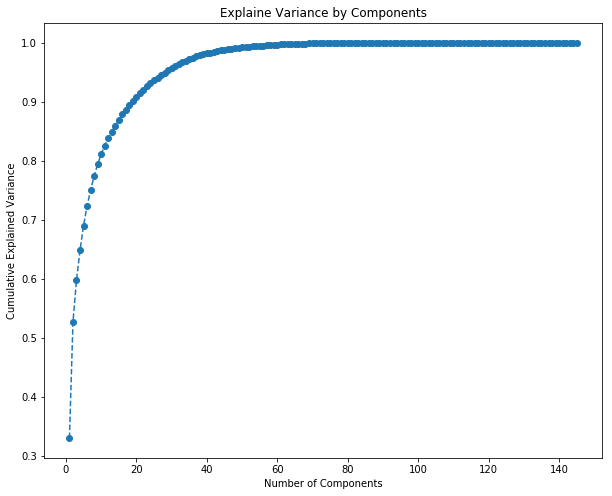

In [16]:
plt.figure(figsize = (10,8))
plt.plot(range(1,146), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explaine Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')

Text(0.5, 0, 'Number of Components')

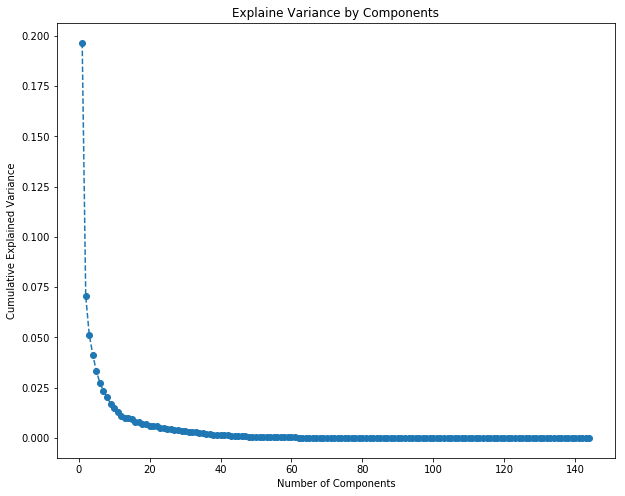

In [17]:

plt.figure(figsize = (10,8))
plt.plot(range(1,145), diff(pca.explained_variance_ratio_.cumsum()), marker = 'o', linestyle = '--')
plt.title('Explaine Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')

In [222]:
pca = PCA(n_components = 2)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [223]:
data_pca = pca.transform(data_std)

For n_clusters = 36 The average silhouette_score is : 0.35940646546621574
For n_clusters = 37 The average silhouette_score is : 0.3662746670509655
For n_clusters = 38 The average silhouette_score is : 0.3690293134214994
For n_clusters = 39 The average silhouette_score is : 0.3665949511780473


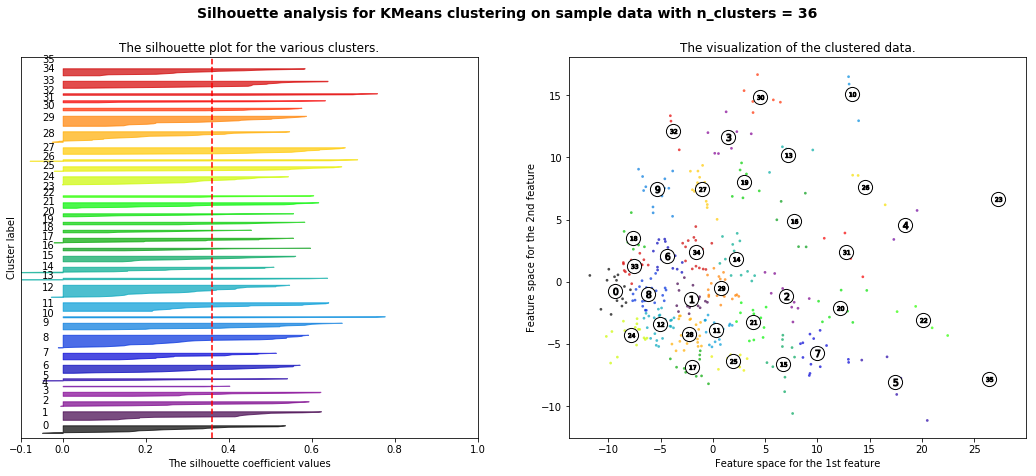

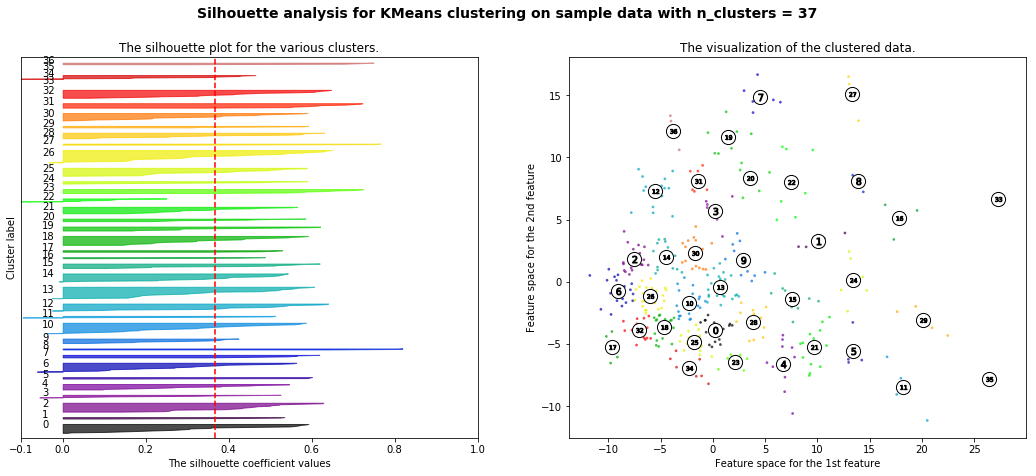

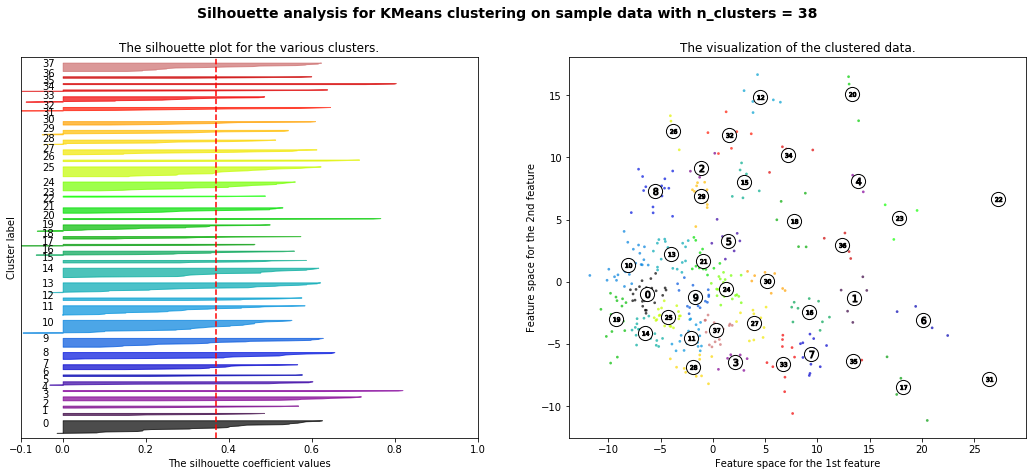

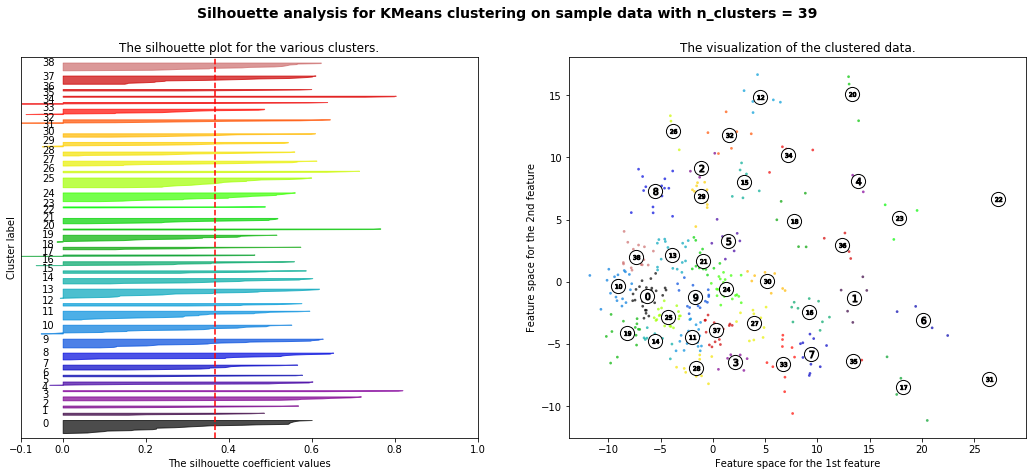

In [224]:
X = data_pca
clusters = []
for n_clusters in range(36,40):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=23)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    clusters.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [225]:
clusters = []
for i in range(2,40):
    kmeans_pca = KMeans(n_clusters = i, init= 'k-means++', random_state = 23)
    kmeans_pca.fit(data_pca)
    labels = kmeans_pca.labels_
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

Text(0.5, 0, 'Number of Clusters')

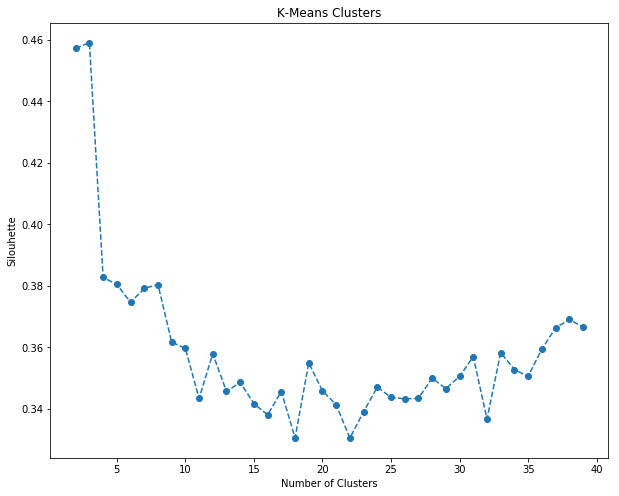

In [226]:
plt.figure(figsize = (10,8))
plt.plot(range(2,40), clusters, marker = 'o', linestyle = '--')
plt.title('K-Means Clusters')
plt.ylabel('Silouhette')
plt.xlabel('Number of Clusters')

In [227]:
silouhette = [0]
for idx, x in enumerate(clusters):
    if idx == 0:
        pass
    else:
        silouhette.append((1 - ((1 - x)/(1-clusters[idx-1]))) * 100)

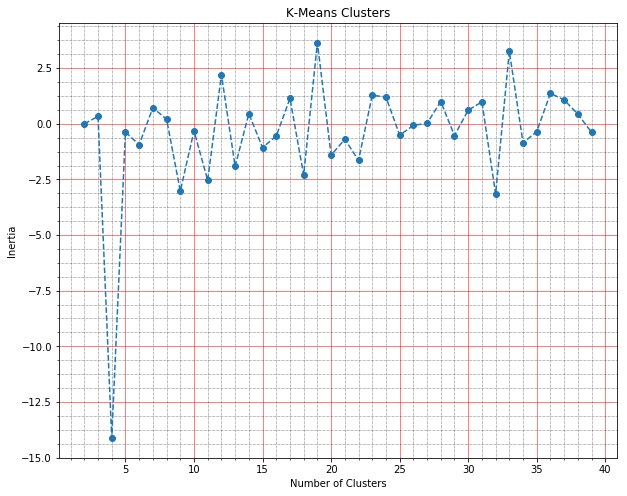

In [228]:
plt.figure(figsize = (10,8))
plt.plot(range(2,40), silouhette, marker = 'o', linestyle = '--')
plt.title('K-Means Clusters')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [229]:
kmeans_pca = KMeans(n_clusters = 38, random_state = 23)
clusters = kmeans_pca.fit(data_pca)

In [230]:
y_hat = clusters.predict(data_pca)

In [231]:
labels = clusters.labels_
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.3690293134214994

379.0283165247724

In [232]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [233]:
finalDf

,PC1,PC2,target
0,1.900057,3.012211,5
1,0.362343,-0.573943,24
2,8.140649,-2.118038,16
3,-2.354755,3.318730,13
4,-0.521371,-1.640142,9
...,...,...,...
386,-8.486571,4.058476,10
387,-4.049713,-3.104312,25
388,3.212252,8.673182,15
389,-2.613974,1.683516,13


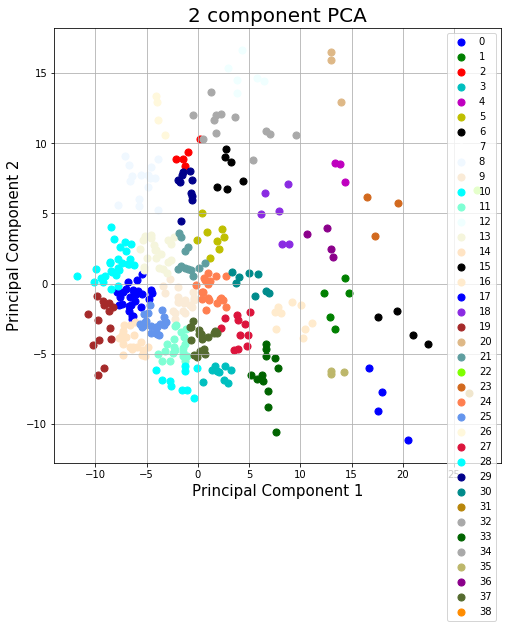

In [235]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,39))
colors1 = list(colors.keys())[0:39]
for target, color in zip(targets,colors1):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [236]:
all_individuals_with_targets = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
all_individuals_with_targets.rename(columns = {0: 'target'}, inplace = True)

In [239]:
all_individuals_with_targets[all_individuals_with_targets.target == 1]

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
19,Pascal Siakam,25,53,53,35.5,8.7,18.9,0.459,2.2,6.0,...,81,3,TOR,8.605153,0.075741,783.0,14.773585,8.25,9.811799,1
30,Jayson Tatum,21,59,59,34.6,8.5,18.9,0.448,2.8,7.1,...,80,2,BOS,7.861814,0.094307,857.6,14.535593,11.25,10.416391,1
42,Jimmy Butler,30,54,54,34.3,6.1,13.4,0.454,0.5,2.2,...,79,8,MIA,9.334156,0.087637,708.0,13.111111,4.50,10.368936,1
310,Brandon Ingram,22,56,56,34.3,8.4,18.0,0.466,2.4,6.3,...,79,3,NOP,8.699049,0.054051,843.0,15.053571,10.50,10.214203,1
337,DeMar DeRozan,30,61,61,34.3,8.2,15.7,0.526,0.1,0.5,...,78,10,SAS,8.862910,0.078683,760.4,12.465574,4.50,11.183610,1


# test stuff

In [171]:
km = KMeans(n_clusters = 24, random_state = 10)

sfs1 = SFS(km, 
           k_features=14, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(data_std, y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  selector.est_.fit(X[:, indices], y, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  selector.est_.fit(X[:, indices], y, **fit_params)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  se

In [177]:
features = [all_individuals.columns[5], all_individuals.columns[34], 
 all_individuals.columns[37], all_individuals.columns[49],
 all_individuals.columns[71], all_individuals.columns[83],
 all_individuals.columns[89], all_individuals.columns[92],
 all_individuals.columns[100], all_individuals.columns[104],
 all_individuals.columns[120], all_individuals.columns[121],
 all_individuals.columns[129], all_individuals.columns[136]]

test = all_individuals.drop([elem for elem in all_individuals.columns if elem not in features], axis = 1)

In [185]:
scaler = StandardScaler()
data_std = scaler.fit_transform(test)

pca = PCA(n_components = 2)
pca.fit(data_std)
data_pca = pca.transform(data_std)

In [186]:
clusters = []
for i in range(20,45):
    gaussian_pca = GaussianMixture(n_components = i, random_state = 10)
    gaussian_pca.fit(data_pca)
    y_hat = gaussian_pca.predict(data_pca)
    labels = pd.Series(y_hat)
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

In [187]:
clusters

[0.24768083251907844,
 0.27170017842255084,
 0.2511478838473684,
 0.2599516784621678,
 0.27930637464043584,
 0.31251455916862714,
 0.30597109547356915,
 0.2613573315267561,
 0.28547839705078926,
 0.2866819463645558,
 0.26914245737637293,
 0.2540368725643441,
 0.3327185337569724,
 0.31078835252714826,
 0.31232459164835746,
 0.3162143970789202,
 0.30810699505788264,
 0.3068971034519597,
 0.31684870880962446,
 0.31513871558157647,
 0.30822367928100175,
 0.3099192283288874,
 0.31270146442810604,
 0.30319096196348044,
 0.30275210240325157]

In [188]:
gaussian_pca = GaussianMixture(n_components=32, random_state = 10)
clusters = gaussian_pca.fit(data_pca)
y_hat = clusters.predict(data_pca)
labels = pd.Series(y_hat)
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.3327185337569724

282.3913880179298

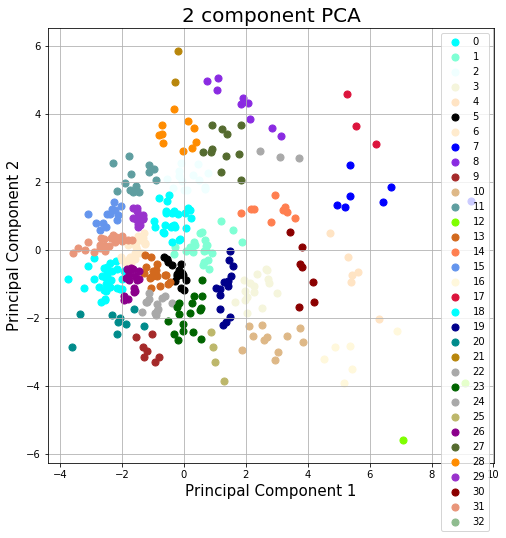

In [190]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,33))
colors = list(colors.keys())[10:43]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [191]:
finalDf = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [229]:
finalDf[finalDf.target == 13]

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
4,George Hill,33,52,0,21.2,3.4,6.5,0.530,1.4,2.9,...,75,11,MIL,4.371161,0.084535,240.2,4.619231,2.25,5.973797,13
23,Terence Davis,22,64,2,17.0,2.8,6.1,0.463,1.4,3.5,...,76,0,TOR,3.543830,0.030618,295.8,4.621875,10.50,5.635245,13
32,Marcus Smart,25,53,39,32.5,4.5,11.9,0.380,2.4,6.9,...,75,5,BOS,6.267864,0.056841,531.8,10.033962,8.25,7.068831,13
110,Ish Smith,31,60,19,26.2,4.4,9.7,0.451,0.9,2.5,...,72,9,WAS,5.443274,0.027193,424.0,7.066667,3.75,6.885921,13
125,Malik Monk,21,55,1,21.3,3.9,8.9,0.434,1.1,3.7,...,75,2,CHO,3.973301,0.010561,393.0,7.145455,11.25,5.072818,13
154,Kevin Knox,20,65,4,17.9,2.2,6.2,0.359,1.0,3.1,...,79,1,NYK,2.526544,0.001723,342.4,5.267692,12.00,4.082250,13
170,Markieff Morris,30,44,16,22.5,4.0,8.8,0.450,1.7,4.3,...,80,8,DET,4.094420,0.022739,315.6,7.172727,4.50,4.752985,13
188,Jeff Teague,31,25,4,20.8,2.7,6.6,0.412,0.4,1.2,...,75,10,ATL,4.076847,0.009100,158.2,6.328000,3.75,2.803221,13
190,Kevin Huerter,21,56,48,31.4,4.5,10.9,0.413,2.3,6.0,...,79,1,ATL,5.749663,0.017309,470.6,8.403571,11.25,6.804107,13
228,Gary Harris,25,56,55,31.8,3.9,9.3,0.420,1.3,3.8,...,76,5,DEN,3.986119,0.032834,397.8,7.103571,8.25,5.584247,13


In [228]:
finalDf[finalDf.Name == 'Marcus Smart']

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
32,Marcus Smart,25,53,39,32.5,4.5,11.9,0.38,2.4,6.9,...,75,5,BOS,6.267864,0.056841,531.8,10.033962,8.25,7.068831,13


# Actual Gaussian

In [275]:
clusters = []
for i in range(20,45):
    gaussian_pca = GaussianMixture(n_components = i, random_state = 42)
    gaussian_pca.fit(data_pca)
    y_hat = gaussian_pca.predict(data_pca)
    labels = pd.Series(y_hat)
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

In [276]:
clusters

[0.2644132467486647,
 0.3162212554528039,
 0.2308510301921902,
 0.28547430033126553,
 0.29191489103085616,
 0.288277347733465,
 0.2563442551280799,
 0.3174189085821483,
 0.3098247811233865,
 0.306331731267314,
 0.3121767491925896,
 0.31030690623039486,
 0.31718818122801595,
 0.33749198521426266,
 0.32624920893938836,
 0.3277434768383609,
 0.2898509446288899,
 0.28932753308227194,
 0.289943160631511,
 0.29468952678748817,
 0.25621171902145473,
 0.2557058816035556,
 0.2799496461813365,
 0.28070746024725507,
 0.2879915038184925]

In [118]:
gaussian_pca = GaussianMixture(n_components=33, random_state = 42)
clusters = gaussian_pca.fit(data_pca)

In [119]:
y_hat = clusters.predict(data_pca)
from sklearn import metrics
labels = pd.Series(y_hat)
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.33749198521426266

308.5337390966651

In [100]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

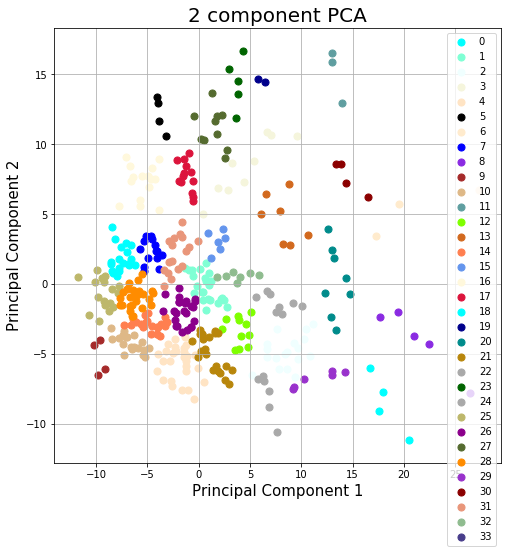

In [101]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,34))
colors = list(colors.keys())[10:44]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [281]:
finalDf = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [282]:
finalDf[finalDf.target == 8]

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
215,LeBron James,35,60,60,34.9,9.8,19.6,0.498,2.2,6.4,...,81,16,LAL,12.910866,0.090347,966.2,16.103333,0.75,13.290745,8
219,Kawhi Leonard,28,51,51,32.2,9.3,19.9,0.469,2.1,5.7,...,79,8,LAC,9.939130,0.093823,820.0,16.078431,6.00,10.904589,8
266,James Harden,30,61,61,36.7,9.9,22.7,0.435,4.4,12.6,...,77,10,HOU,11.766755,0.103028,1343.6,22.026230,4.50,13.903621,8
270,Russell Westbrook,31,53,53,35.9,10.7,22.6,0.474,1.0,3.8,...,75,11,HOU,11.548004,0.081523,1005.4,18.969811,3.75,10.974565,8
279,Luka Dončić,20,54,54,33.3,9.5,20.6,0.461,2.9,9.1,...,79,1,DAL,13.242237,0.120817,1022.4,18.933333,12.00,12.283173,8


In [265]:
finalDf[finalDf.Name == 'LeBron James']

,Name,Age,G,GS,MP/G,FGMade/G,FGA/G,FGPerc,ThreeMade/G,ThreeA/G,...,Ht,Exp,Team,VI,PAWS,NSPTotal,NSP/G,SL,AV,target
215,LeBron James,35,60,60,34.9,9.8,19.6,0.498,2.2,6.4,...,81,16,LAL,12.910866,0.090347,966.2,16.103333,0.75,13.290745,8


In [ ]:
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('pca', PCA(n_components=10)),
                 ('tree', tree.DecisionTreeClassifier(random_state=123))])